In [3]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
conn = psycopg2.connect(
    database = "threats",
    user = "postgres",
    password = "shreema@12",
    host = "localhost",
    port = "5432")

In [5]:
query = "select * from threats"
df = pd.read_sql(query,conn)

C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_6168\3231221658.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            3000 non-null   object 
 1   year                               3000 non-null   int64  
 2   attack_type                        3000 non-null   object 
 3   target_industry                    3000 non-null   object 
 4   financial_loss_in_million_         3000 non-null   float64
 5   number_of_affected_users           3000 non-null   int64  
 6   attack_source                      3000 non-null   object 
 7   security_vulnerability_type        3000 non-null   object 
 8   defense_mechanism_used             3000 non-null   object 
 9   incident_resolution_time_in_hours  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [11]:
df.head(6)

,country,year,attack_type,target_industry,financial_loss_in_million_,number_of_affected_users,attack_source,security_vulnerability_type,defense_mechanism_used,incident_resolution_time_in_hours
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
5,Germany,2017,Man-in-the-Middle,Retail,98.24,285201,Unknown,Social Engineering,Antivirus,25


##DATA CLEANING

In [15]:
# Check for missing values
print(df.isnull().sum())

# Convert data types
df['financial_loss_in_million_'] = pd.to_numeric(df['financial_loss_in_million_'], errors='coerce')
df['number_of_affected_users'] = pd.to_numeric(df['number_of_affected_users'], errors='coerce')
df['incident_resolution_time_in_hours'] = pd.to_numeric(df['incident_resolution_time_in_hours'], errors='coerce')

# Fill or drop missing values
df.fillna(0, inplace=True)  # Or: df.dropna(inplace=True)


country                              0
year                                 0
attack_type                          0
target_industry                      0
financial_loss_in_million_           0
number_of_affected_users             0
attack_source                        0
security_vulnerability_type          0
defense_mechanism_used               0
incident_resolution_time_in_hours    0
dtype: int64


##EXPLORATORY DATA ANALYSIS

ATTACKS PER YEAR

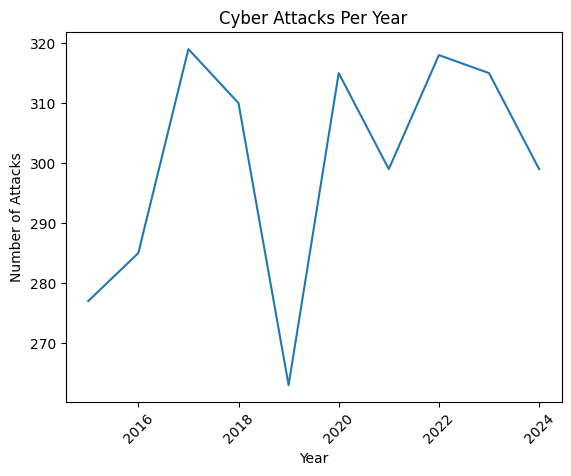

In [20]:
attacks_per_year = df['year'].value_counts().sort_index()
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Cyber Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

FINANCIAL LOSS BY COUNTRY

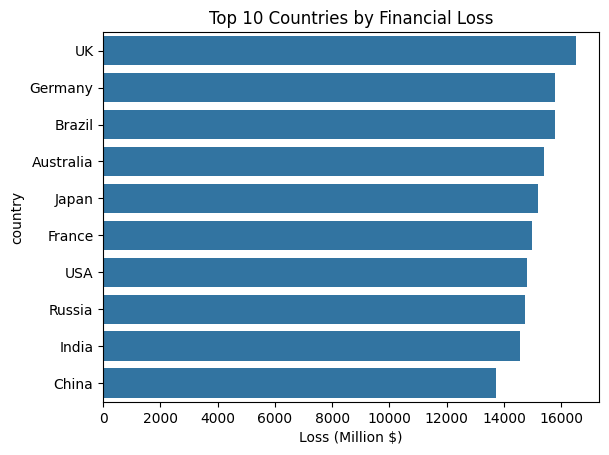

In [23]:
top_countries = df.groupby('country')['financial_loss_in_million_'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Financial Loss')
plt.xlabel('Loss (Million $)')
plt.show()


##ATTACK TYPE FREQUENCY

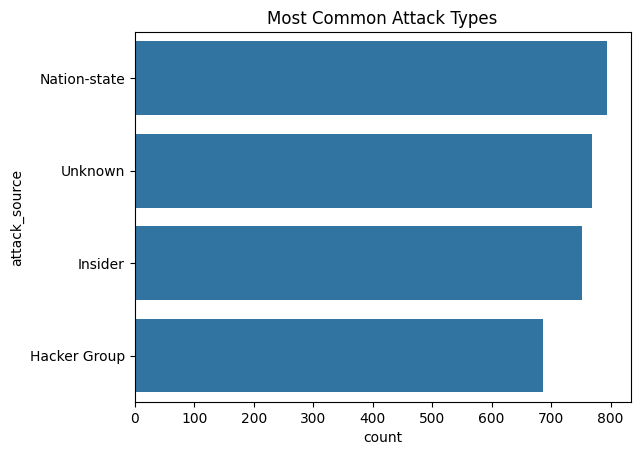

In [25]:
sns.countplot(y='attack_source', data=df, order=df['attack_source'].value_counts().index)
plt.title('Most Common Attack Types')
plt.show()


##LOSS PER USERS

In [40]:
df['Loss per User'] = df['financial_loss_in_million_'] / df['number_of_affected_users']


##CORRELATION CHECK

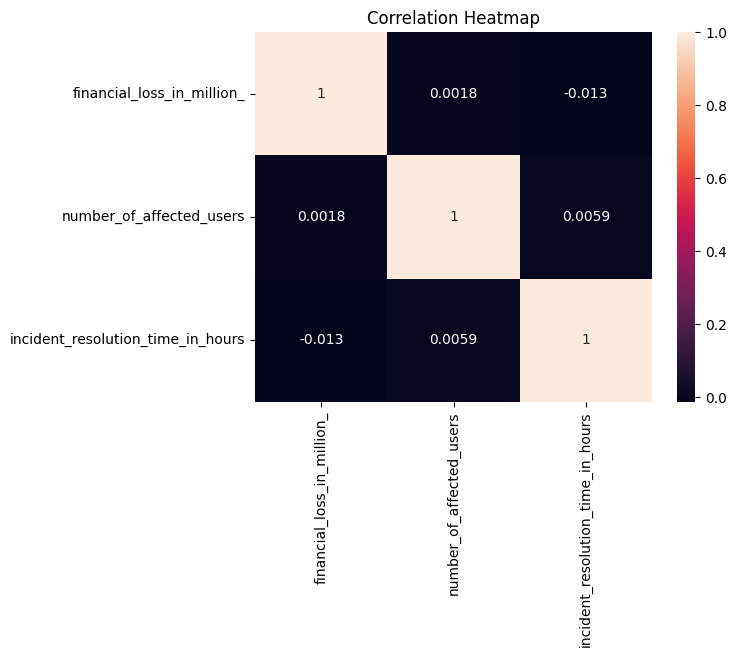

In [36]:
sns.heatmap(df[['financial_loss_in_million_', 'number_of_affected_users', 'incident_resolution_time_in_hours']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
